<a href="https://colab.research.google.com/github/Aboubacar2012/Data_Analysis_Project/blob/main/Project_07_Explanatory_Babies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Project 7: Explanatory Data Analysis & Advanced Visualization (Baby Names Dataset)

## First Inspection: The most popular Names in 2018

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = '{:.2f}'.format

In [5]:
df = pd.read_csv("/content/drive/MyDrive/ml_data/MOVIES/Project_07/us_baby_names.csv")

In [6]:
df

,Year,Name,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
...,...,...,...,...
1957041,2018,Zylas,M,5
1957042,2018,Zyran,M,5
1957043,2018,Zyrie,M,5
1957044,2018,Zyron,M,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957046 entries, 0 to 1957045
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Year    int64 
 1   Name    object
 2   Gender  object
 3   Count   int64 
dtypes: int64(2), object(2)
memory usage: 59.7+ MB


In [8]:
df.nunique()

Year        139
Name      98400
Gender        2
Count     13720
dtype: int64

In [9]:
df.Gender = df.Gender.astype("category")

In [10]:
names_2018 = df[df.Year == 2018].copy()
names_2018

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688
1925014,2018,Olivia,F,17921
1925015,2018,Ava,F,14924
1925016,2018,Isabella,F,14464
1925017,2018,Sophia,F,13928
...,...,...,...,...
1957041,2018,Zylas,M,5
1957042,2018,Zyran,M,5
1957043,2018,Zyrie,M,5
1957044,2018,Zyron,M,5


In [11]:
names_2018[names_2018.Gender == "F"].nlargest(10, "Count")

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688
1925014,2018,Olivia,F,17921
1925015,2018,Ava,F,14924
1925016,2018,Isabella,F,14464
1925017,2018,Sophia,F,13928
1925018,2018,Charlotte,F,12940
1925019,2018,Mia,F,12642
1925020,2018,Amelia,F,12301
1925021,2018,Harper,F,10582
1925022,2018,Evelyn,F,10376


In [12]:
def most_pop(year, gender, n):
    return df[(df.Year == year) & (df.Gender == gender)].nlargest(n, "Count")

In [13]:
most_pop(2018, "F", 10)

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688
1925014,2018,Olivia,F,17921
1925015,2018,Ava,F,14924
1925016,2018,Isabella,F,14464
1925017,2018,Sophia,F,13928
1925018,2018,Charlotte,F,12940
1925019,2018,Mia,F,12642
1925020,2018,Amelia,F,12301
1925021,2018,Harper,F,10582
1925022,2018,Evelyn,F,10376


In [14]:
most_pop(2018, "M", 10)

,Year,Name,Gender,Count
1943042,2018,Liam,M,19837
1943043,2018,Noah,M,18267
1943044,2018,William,M,14516
1943045,2018,James,M,13525
1943046,2018,Oliver,M,13389
1943047,2018,Benjamin,M,13381
1943048,2018,Elijah,M,12886
1943049,2018,Lucas,M,12585
1943050,2018,Mason,M,12435
1943051,2018,Logan,M,12352


## Evergreen Names (1880 - 2018)

In [15]:
f_2018 = most_pop(2018, "F", 20)
f_2018

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688
1925014,2018,Olivia,F,17921
1925015,2018,Ava,F,14924
1925016,2018,Isabella,F,14464
1925017,2018,Sophia,F,13928
1925018,2018,Charlotte,F,12940
1925019,2018,Mia,F,12642
1925020,2018,Amelia,F,12301
1925021,2018,Harper,F,10582
1925022,2018,Evelyn,F,10376


In [16]:
f_1880 = most_pop(1880, "F", 20)
f_1880

,Year,Name,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
5,1880,Margaret,F,1578
6,1880,Ida,F,1472
7,1880,Alice,F,1414
8,1880,Bertha,F,1320
9,1880,Sarah,F,1288


In [17]:
f_2018[["Name", "Count"]].merge(f_1880[["Name", "Count"]], how = "inner", on = "Name")

,Name,Count_x,Count_y
0,Emma,18688,2003
1,Elizabeth,8513,1939
2,Ella,8055,1156


In [18]:
f_evergreen = f_2018[["Name", "Count"]].merge(f_1880[["Name", "Count"]], how = "inner", on = "Name", 
                           suffixes=("_2018", "_1880"))
f_evergreen

,Name,Count_2018,Count_1880
0,Emma,18688,2003
1,Elizabeth,8513,1939
2,Ella,8055,1156


In [19]:
m_2018 = most_pop(2018, "M", 20)
m_2018

,Year,Name,Gender,Count
1943042,2018,Liam,M,19837
1943043,2018,Noah,M,18267
1943044,2018,William,M,14516
1943045,2018,James,M,13525
1943046,2018,Oliver,M,13389
1943047,2018,Benjamin,M,13381
1943048,2018,Elijah,M,12886
1943049,2018,Lucas,M,12585
1943050,2018,Mason,M,12435
1943051,2018,Logan,M,12352


In [20]:
m_1880 = most_pop(1880, "M", 20)
m_1880

,Year,Name,Gender,Count
942,1880,John,M,9655
943,1880,William,M,9532
944,1880,James,M,5927
945,1880,Charles,M,5348
946,1880,George,M,5126
947,1880,Frank,M,3242
948,1880,Joseph,M,2632
949,1880,Thomas,M,2534
950,1880,Henry,M,2444
951,1880,Robert,M,2415


In [21]:
m_evergreen = m_2018[["Name", "Count"]].merge(m_1880[["Name", "Count"]], how = "inner", on = "Name", 
                                              suffixes=("_2018", "_1880"))
m_evergreen

,Name,Count_2018,Count_1880
0,William,14516,9532
1,James,13525,5927
2,Henry,10649,2444


## Advanced Data Aggregation

In [23]:
df = pd.read_csv("/content/drive/MyDrive/ml_data/MOVIES/Project_07/us_baby_names.csv")

In [24]:
df

,Year,Name,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
...,...,...,...,...
1957041,2018,Zylas,M,5
1957042,2018,Zyran,M,5
1957043,2018,Zyrie,M,5
1957044,2018,Zyron,M,5


In [25]:
df.groupby(["Name", "Gender"]).Count.sum().reset_index(level = -1)

,Gender,Count
Name,,
Aaban,M,114
Aabha,F,35
Aabid,M,16
Aabidah,F,5
Aabir,M,10
...,...,...
Zyvion,M,5
Zyvon,M,7
Zyyanna,F,6


In [26]:
agg = df.groupby(["Name", "Gender"]).agg(Total = ("Count", "sum"), No_Year = ("Count", "count"), 
                                         First_Year = ("Year", "min"), Last_Year = ("Year", "max"),
                                         Max_Count = ("Count", "max"))

In [27]:
agg

,,Total,No_Year,First_Year,Last_Year,Max_Count
Name,Gender,,,,,
Aaban,M,114,11,2007,2018,16
Aabha,F,35,5,2011,2016,9
Aabid,M,16,3,2003,2018,6
Aabidah,F,5,1,2018,2018,5
Aabir,M,10,2,2016,2018,5
...,...,...,...,...,...,...
Zyvion,M,5,1,2009,2009,5
Zyvon,M,7,1,2015,2015,7
Zyyanna,F,6,1,2010,2010,6


In [28]:
def best_year(group):
    return group.nlargest(1, "Count").Year

In [30]:
#best_y = df.groupby(["Name", "Gender"]).apply(best_year) # this can take a couple of minutes!!!

In [ ]:
best_y

In [ ]:
best_y.droplevel(-1)

In [ ]:
agg["Best_Year"] = best_y.droplevel(-1)

In [ ]:
agg

In [ ]:
agg.reset_index(inplace = True)

In [ ]:
agg

In [ ]:
agg[(agg.Name == "Mary") & (agg.Gender == "M")]

## Most Popular Names of all Times

In [31]:
agg.groupby("Gender").apply(lambda x: x.nlargest(10, "Total"))

Total  No_Year  First_Year  Last_Year  Max_Count
Gender Name      Gender                                                    
F      Mary      F       4125675      139        1880       2018      73985
       Elizabeth F       1638349      139        1880       2018      20744
       Patricia  F       1572016      135        1884       2018      56442
       Jennifer  F       1467207      101        1916       2018      63603
       Linda     F       1452668      139        1880       2018      99689
       Barbara   F       1434397      139        1880       2018      48792
       Margaret  F       1248985      139        1880       2018      28467
       Susan     F       1121703      139        1880       2018      47402
       Dorothy   F       1107635      139        1880       2018      39999
       Sarah     F       1077746      139        1880       2018      28484
M      James     M       5164280      139        1880       2018      94757
       John      M       5124817      139        1880       2018      88319
       Robert    M       4820129      139        1880       2018      91640
       Michael   M       4362731      139        1880       2018      92704
       William   M       4117369      139        1880       2018      66989
       David     M       3621322      139        1880       2018      86253
       Joseph    M       2613304      139        1880       2018      32732
       Richard   M       2565301      139        1880       2018      58868
       Charles   M       2392779      139        1880       2018      40770
       Thomas    M       2311849      139        1880       2018      48652

In [32]:
all_times = agg.groupby("Gender").apply(lambda x: x.nlargest(10, "Total")).reset_index(drop = True)
all_times

,Total,No_Year,First_Year,Last_Year,Max_Count
0,4125675,139,1880,2018,73985
1,1638349,139,1880,2018,20744
2,1572016,135,1884,2018,56442
3,1467207,101,1916,2018,63603
4,1452668,139,1880,2018,99689
5,1434397,139,1880,2018,48792
6,1248985,139,1880,2018,28467
7,1121703,139,1880,2018,47402
8,1107635,139,1880,2018,39999
9,1077746,139,1880,2018,28484


In [33]:
import seaborn as sns

In [34]:
plt.figure(figsize = (15, 10))
sns.barplot(x = "Name", y = "Total", data = all_times, hue = "Gender")
plt.show()

ValueError: ignored

<Figure size 1080x720 with 0 Axes>

## General Trends over time (1880 - 2018)

In [35]:
pd.options.display.float_format = '{:.0f}'.format

In [36]:
babies_per_year = df.groupby("Year").Count.sum()

In [37]:
babies_per_year

Year
1880     201484
1881     192696
1882     221533
1883     216944
1884     243461
         ...   
2014    3698914
2015    3691990
2016    3657797
2017    3561975
2018    3487353
Name: Count, Length: 139, dtype: int64

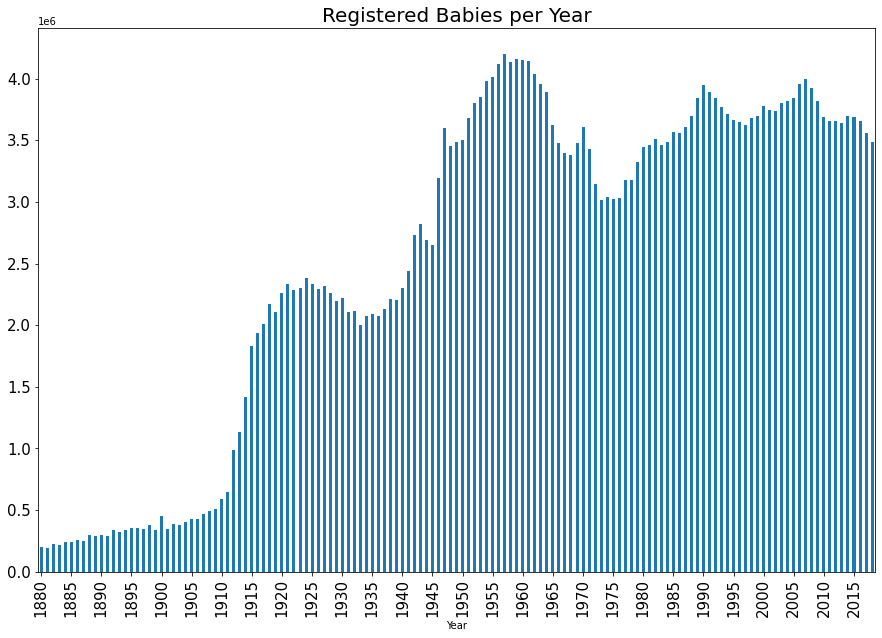

In [38]:
babies_per_year.plot(kind = "bar", y= "Count", figsize = (15, 10), fontsize = 15)
plt.xticks(ticks = (range(0, len(babies_per_year), 5)), labels =  range(1880, 2019, 5))
plt.title("Registered Babies per Year", fontsize = 20)
plt.show()

In [39]:
diff_names = df.groupby("Year").Name.count()
diff_names

Year
1880     2000
1881     1935
1882     2127
1883     2084
1884     2297
        ...  
2014    33243
2015    33121
2016    33010
2017    32590
2018    32033
Name: Name, Length: 139, dtype: int64

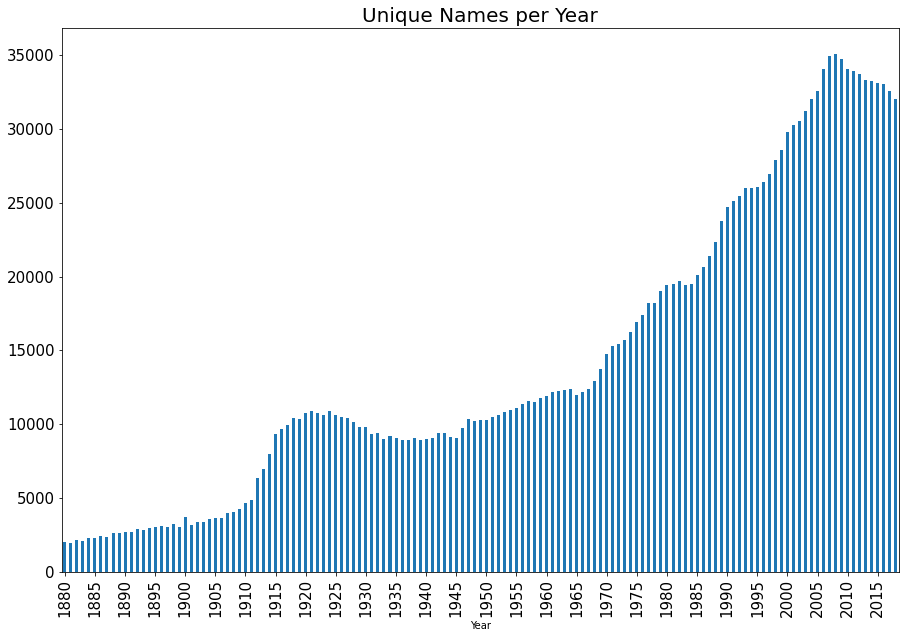

In [40]:
diff_names.plot(kind = "bar", figsize = (15, 10), fontsize = 15)
plt.xticks(ticks = (range(0, len(diff_names), 5)), labels =  range(1880, 2019, 5))
plt.title("Unique Names per Year", fontsize = 20)
plt.show()

## Creating the Features "Popularity" and "Rank"

In [41]:
df

,Year,Name,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
...,...,...,...,...
1957041,2018,Zylas,M,5
1957042,2018,Zyran,M,5
1957043,2018,Zyrie,M,5
1957044,2018,Zyron,M,5


__Popularity (babies per million)__

In [42]:
df.groupby(["Year", "Gender"]).Count.transform("sum")

0            90994
1            90994
2            90994
3            90994
4            90994
            ...   
1957041    1800392
1957042    1800392
1957043    1800392
1957044    1800392
1957045    1800392
Name: Count, Length: 1957046, dtype: int64

In [43]:
7065 / 90994 * 1000000

77642.48192188496

In [44]:
df.Count.div(df.groupby(["Year", "Gender"]).Count.transform("sum"))*1000000

0         77642
1         28617
2         22012
3         21309
4         19188
           ... 
1957041       3
1957042       3
1957043       3
1957044       3
1957045       3
Name: Count, Length: 1957046, dtype: float64

In [45]:
df["Popularity"] = df.Count.div(df.groupby(["Year", "Gender"]).Count.transform("sum"))*1000000

In [46]:
df

,Year,Name,Gender,Count,Popularity
0,1880,Mary,F,7065,77642
1,1880,Anna,F,2604,28617
2,1880,Emma,F,2003,22012
3,1880,Elizabeth,F,1939,21309
4,1880,Minnie,F,1746,19188
...,...,...,...,...,...
1957041,2018,Zylas,M,5,3
1957042,2018,Zyran,M,5,3
1957043,2018,Zyrie,M,5,3
1957044,2018,Zyron,M,5,3


__Rank__

In [47]:
df.groupby(["Year", "Gender"]).Count.apply(lambda x: x.rank(ascending = False))

0             1
1             2
2             3
3             4
4             5
           ... 
1957041   13042
1957042   13042
1957043   13042
1957044   13042
1957045   13042
Name: Count, Length: 1957046, dtype: float64

In [48]:
df["Rank"] =  df.groupby(["Year", "Gender"]).Count.apply(lambda x: x.rank(ascending = False))

In [49]:
df

,Year,Name,Gender,Count,Popularity,Rank
0,1880,Mary,F,7065,77642,1
1,1880,Anna,F,2604,28617,2
2,1880,Emma,F,2003,22012,3
3,1880,Elizabeth,F,1939,21309,4
4,1880,Minnie,F,1746,19188,5
...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,3,13042
1957042,2018,Zyran,M,5,3,13042
1957043,2018,Zyrie,M,5,3,13042
1957044,2018,Zyron,M,5,3,13042


In [50]:
df[(df.Year == 2018) & (df.Gender == "M")].tail(60)

,Year,Name,Gender,Count,Popularity,Rank
1956986,2018,Zachry,M,5,3,13042
1956987,2018,Zaeed,M,5,3,13042
1956988,2018,Zahavi,M,5,3,13042
1956989,2018,Zaheir,M,5,3,13042
1956990,2018,Zahyan,M,5,3,13042
1956991,2018,Zaidenn,M,5,3,13042
1956992,2018,Zaier,M,5,3,13042
1956993,2018,Zailyn,M,5,3,13042
1956994,2018,Zaion,M,5,3,13042
1956995,2018,Zakery,M,5,3,13042


In [51]:
df[(df.Year == 2018) & (df.Gender == "M")].Popularity.sum()

999999.9999999999

## Visualizing Name Trends over Time

In [52]:
df

,Year,Name,Gender,Count,Popularity,Rank
0,1880,Mary,F,7065,77642,1
1,1880,Anna,F,2604,28617,2
2,1880,Emma,F,2003,22012,3
3,1880,Elizabeth,F,1939,21309,4
4,1880,Minnie,F,1746,19188,5
...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,3,13042
1957042,2018,Zyran,M,5,3,13042
1957043,2018,Zyrie,M,5,3,13042
1957044,2018,Zyron,M,5,3,13042


In [53]:
mary = df[(df.Name == "Mary") & (df.Gender == "F")]
mary.tail(60)

,Year,Name,Gender,Count,Popularity,Rank
560704,1959,Mary,F,54474,26927,1
572471,1960,Mary,F,51475,25457,1
584392,1961,Mary,F,47680,23632,1
596575,1962,Mary,F,43486,22113,2
608784,1963,Mary,F,41550,21559,2
621066,1964,Mary,F,40990,21633,2
633463,1965,Mary,F,34270,19416,2
645416,1966,Mary,F,28884,17072,3
657568,1967,Mary,F,25313,15333,4
669967,1968,Mary,F,21725,13245,6


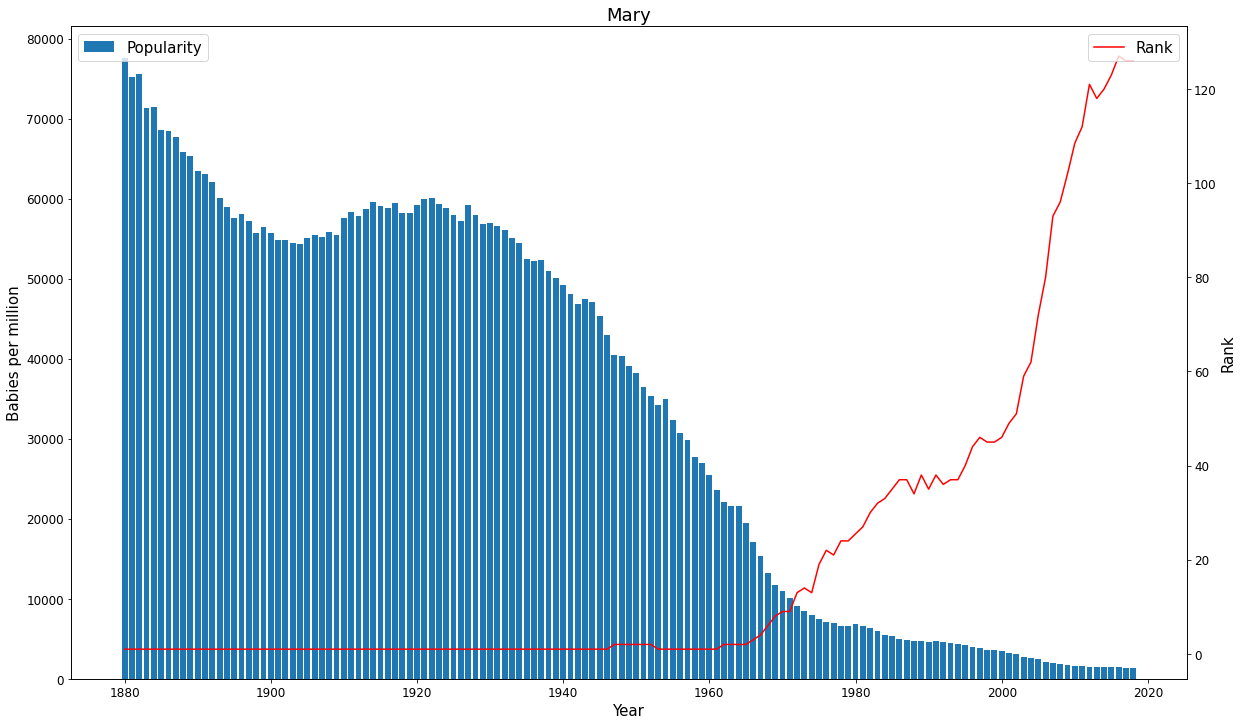

In [61]:
fig, ax1 = plt.subplots(figsize = (20, 12))
ax1.bar(x = mary.Year, height= mary.Popularity, label = "Popularity")
ax2 = ax1.twinx()
ax2.plot(mary.Year, mary.Rank, color = "red", label = "Rank")
ax1.set_xlabel("Year", fontsize = 15)
ax1.set_ylabel("Babies per million", fontsize = 15)
ax2.set_ylabel("Rank", fontsize = 15)
ax1.set_title("Mary", fontsize = 18)
ax1.tick_params(labelsize = 12)
ax2.tick_params(labelsize = 12)
ax1.legend(loc = 2, fontsize = 15)
ax2.legend(loc = 1, fontsize = 15)
plt.show()

In [59]:
def plot_name(name, gender, crit = "Popularity"):
    data = df.loc[(df.Name == name) & (df.Gender == gender), ["Name", "Gender", "Year", "Rank", crit]]
    data = data.set_index("Year")
    
    fig, ax1 = plt.subplots(figsize = (20, 12))
    ax1.bar(x = data.index, height= data[crit], label = crit)
    ax2 = ax1.twinx()
    ax2.plot(data.index, data.Rank, color = "red", label = "Rank")
    ax1.set_xlabel("Year", fontsize = 15)
    ax1.set_ylabel(crit, fontsize = 15)
    ax2.set_ylabel("Rank", fontsize = 15)
    ax1.set_title(name, fontsize = 18)
    ax1.tick_params(labelsize = 12)
    ax2.tick_params(labelsize = 12)
    ax1.legend(loc = 2, fontsize = 15)
    ax2.legend(loc = 1, fontsize = 15)
    plt.show()

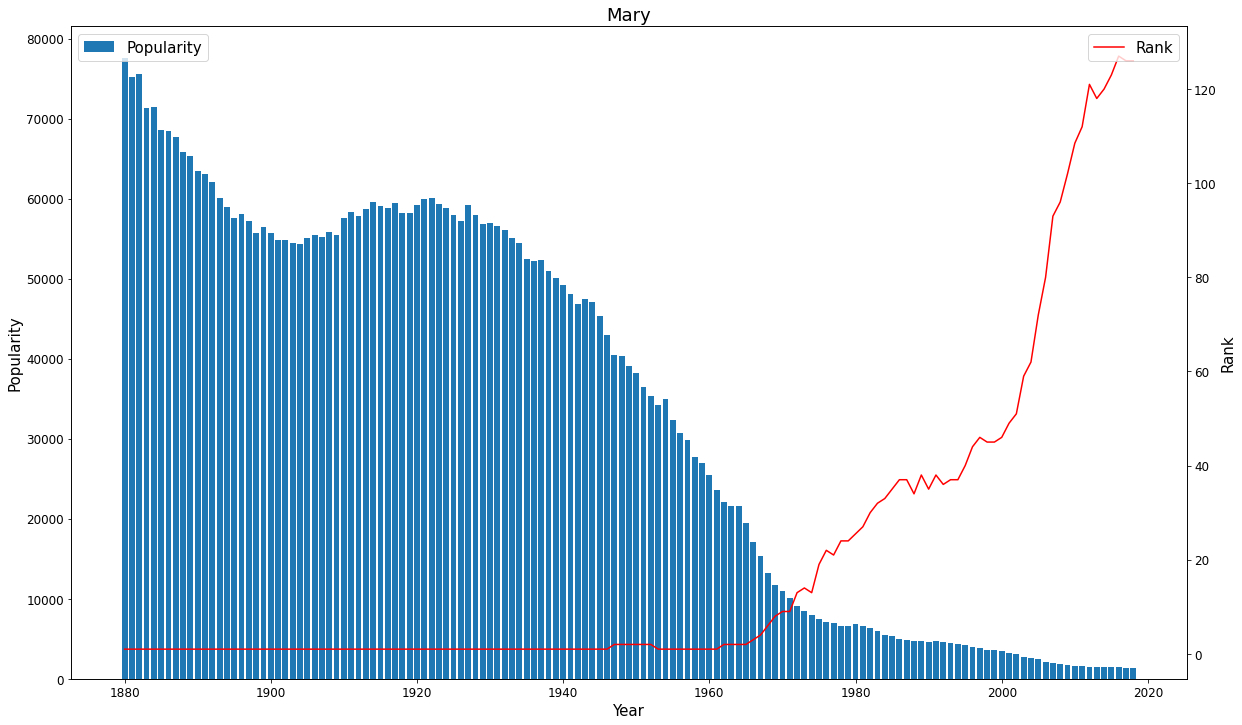

In [60]:
plot_name("Mary", "F")

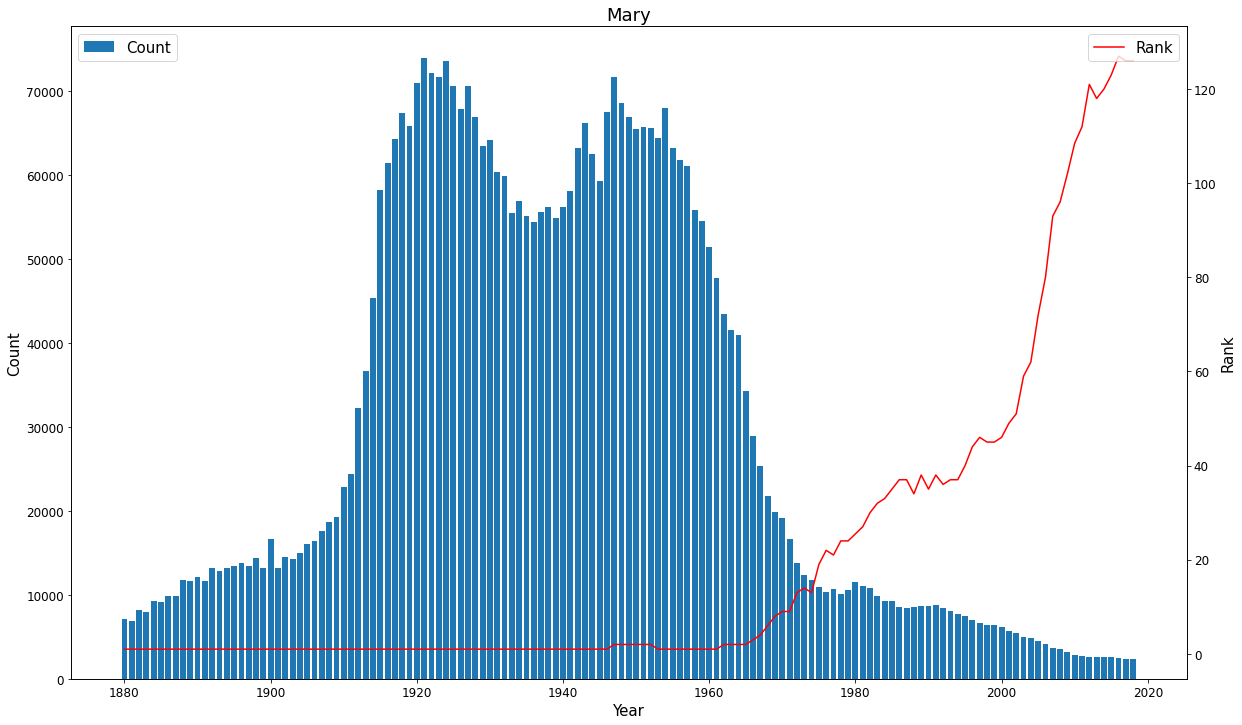

In [62]:
plot_name("Mary", "F", crit = "Count")

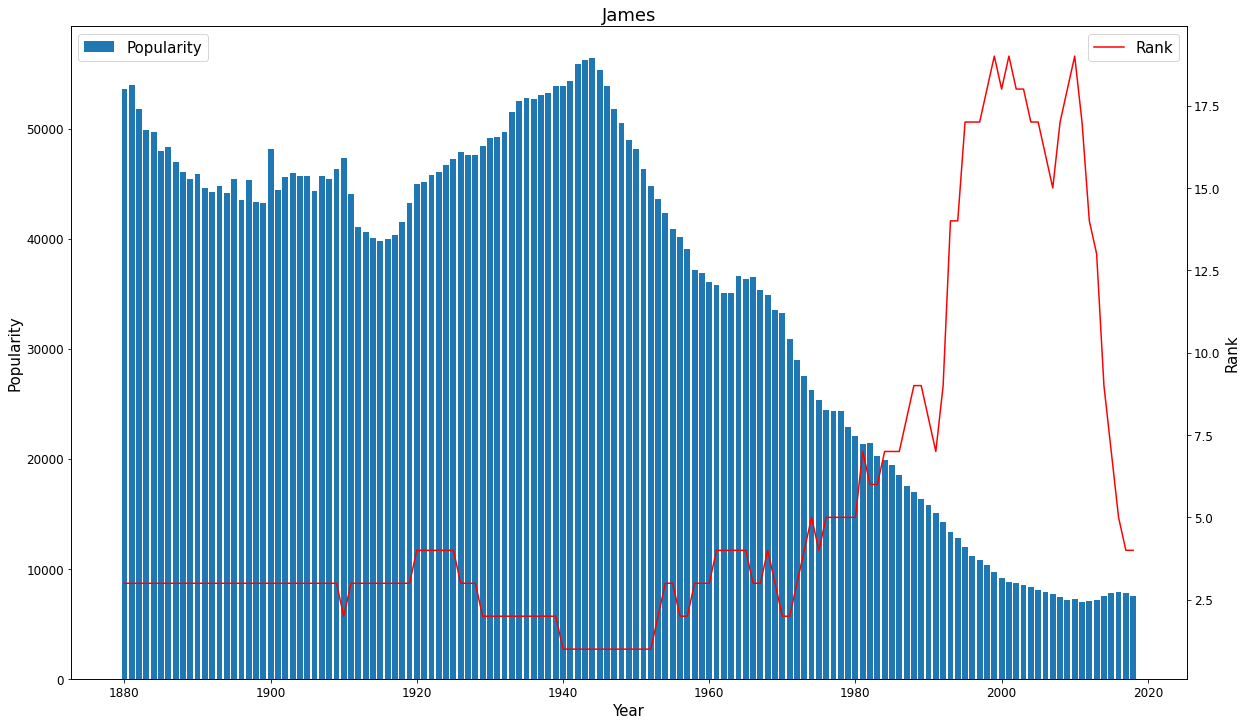

In [63]:
plot_name("James", "M", crit = "Popularity")

In [64]:
m_evergreen

,Name,Count_2018,Count_1880
0,William,14516,9532
1,James,13525,5927
2,Henry,10649,2444


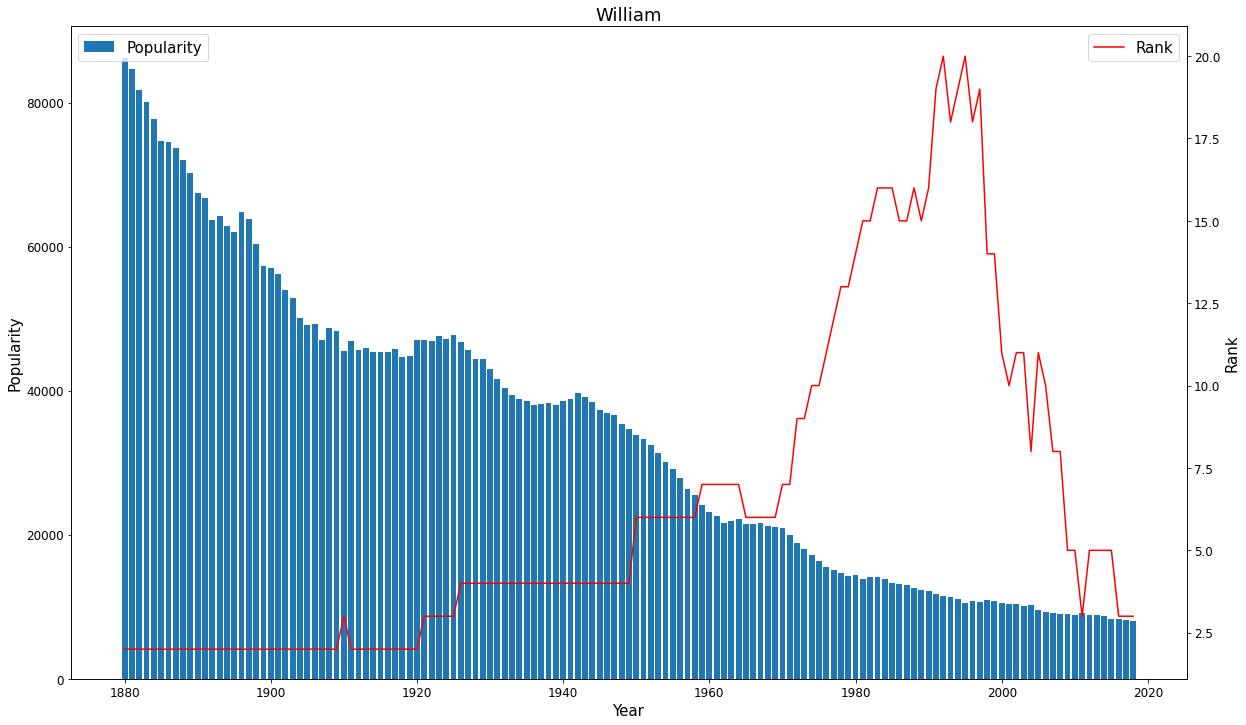

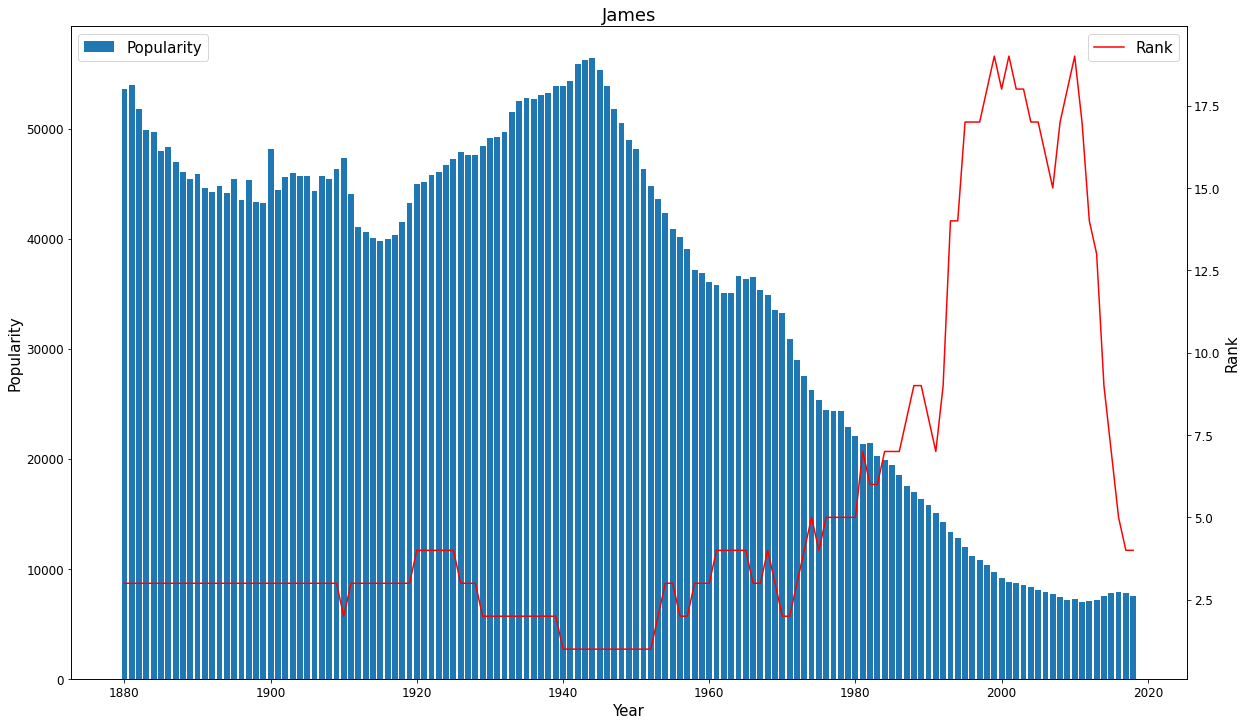

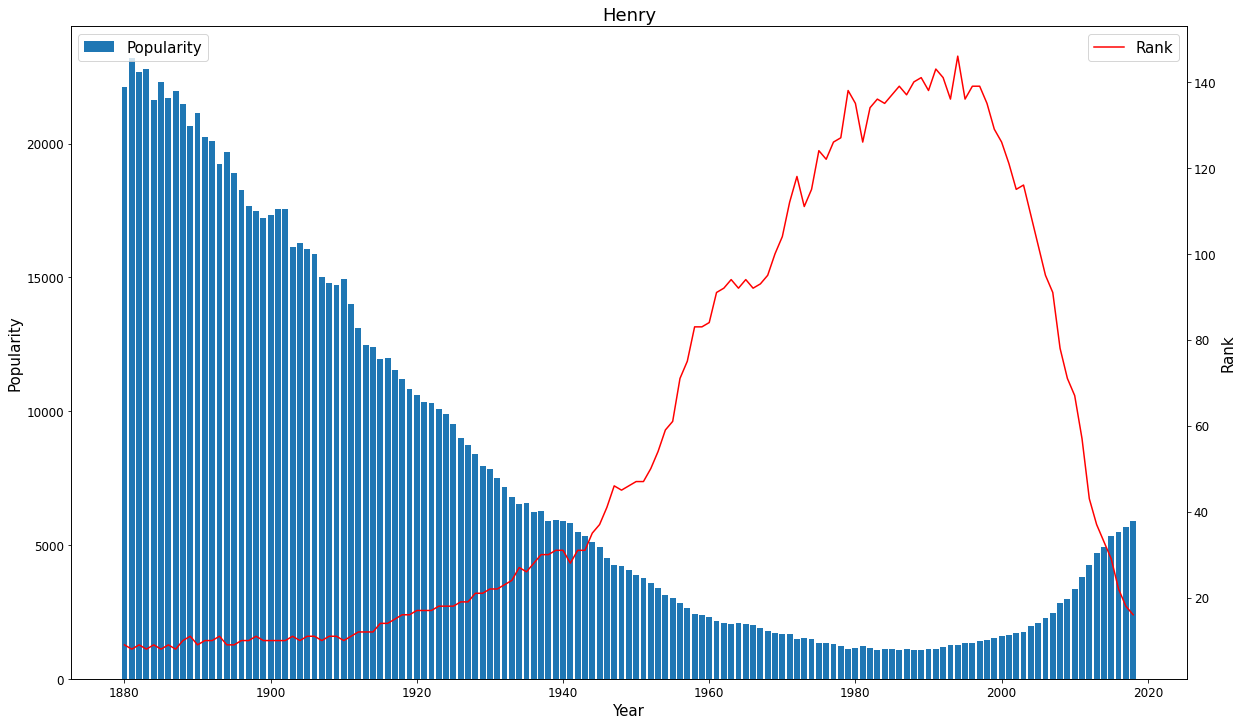

In [65]:
for name in m_evergreen.Name:
    plot_name(name, "M", crit = "Popularity")

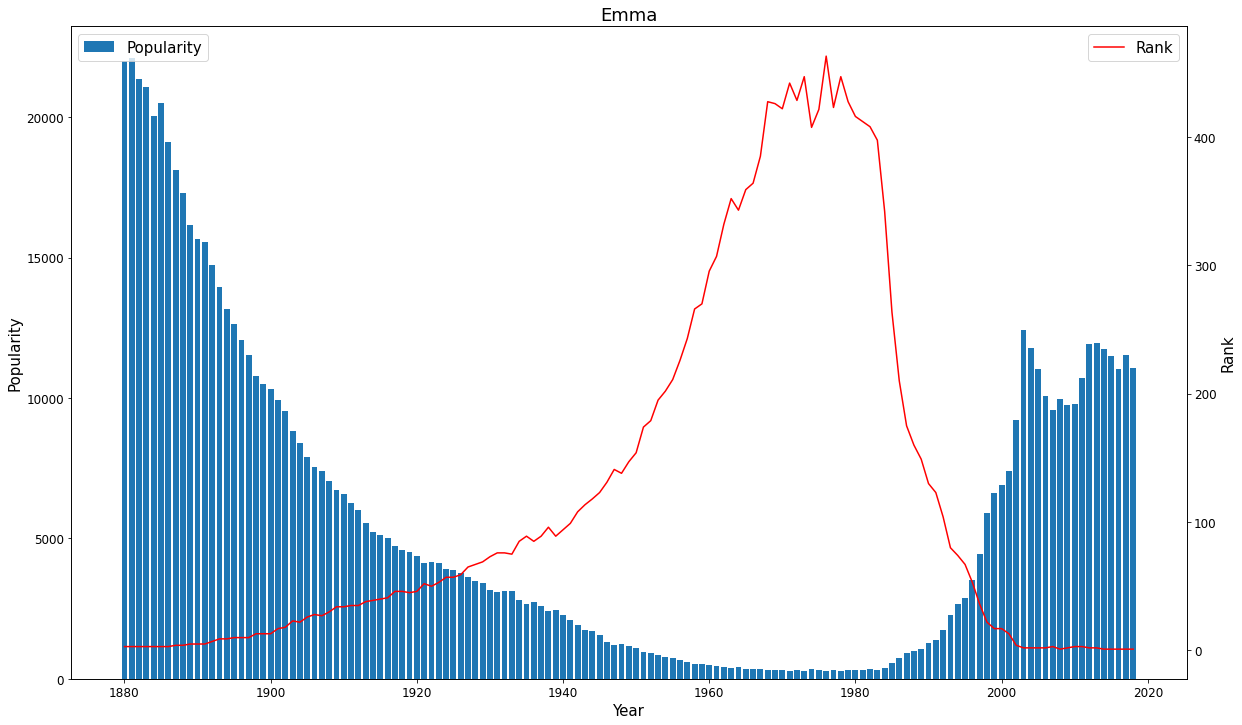

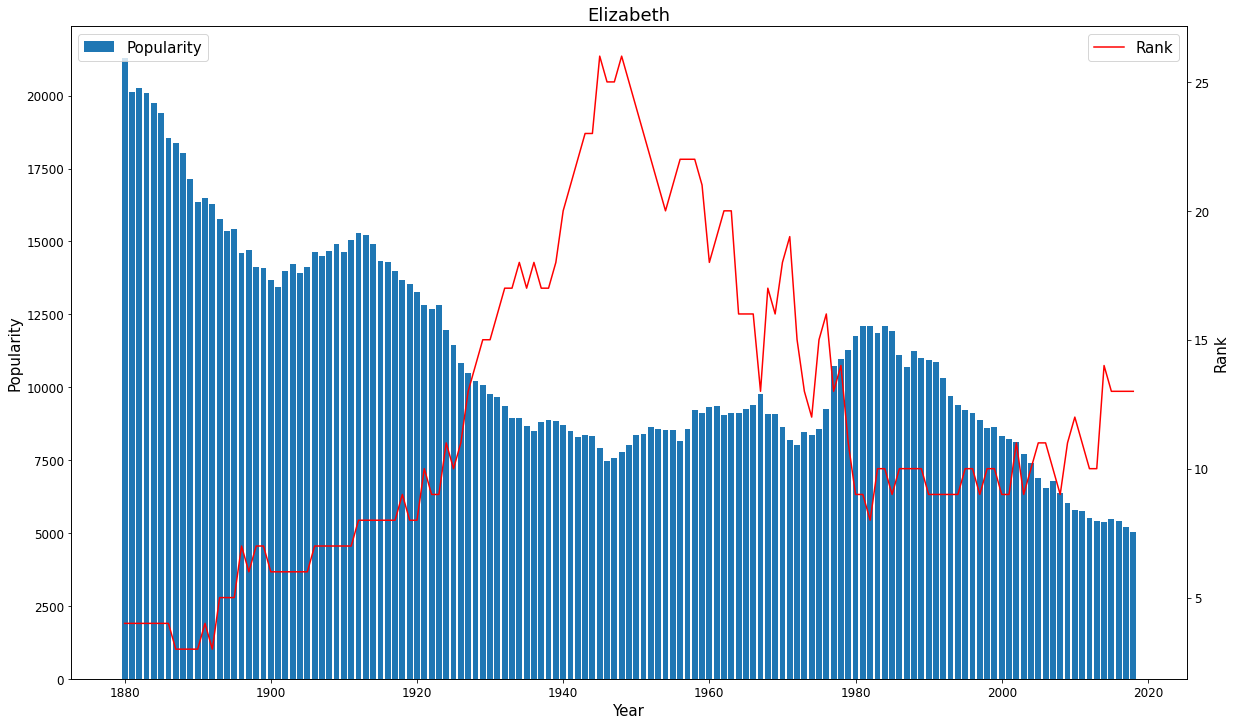

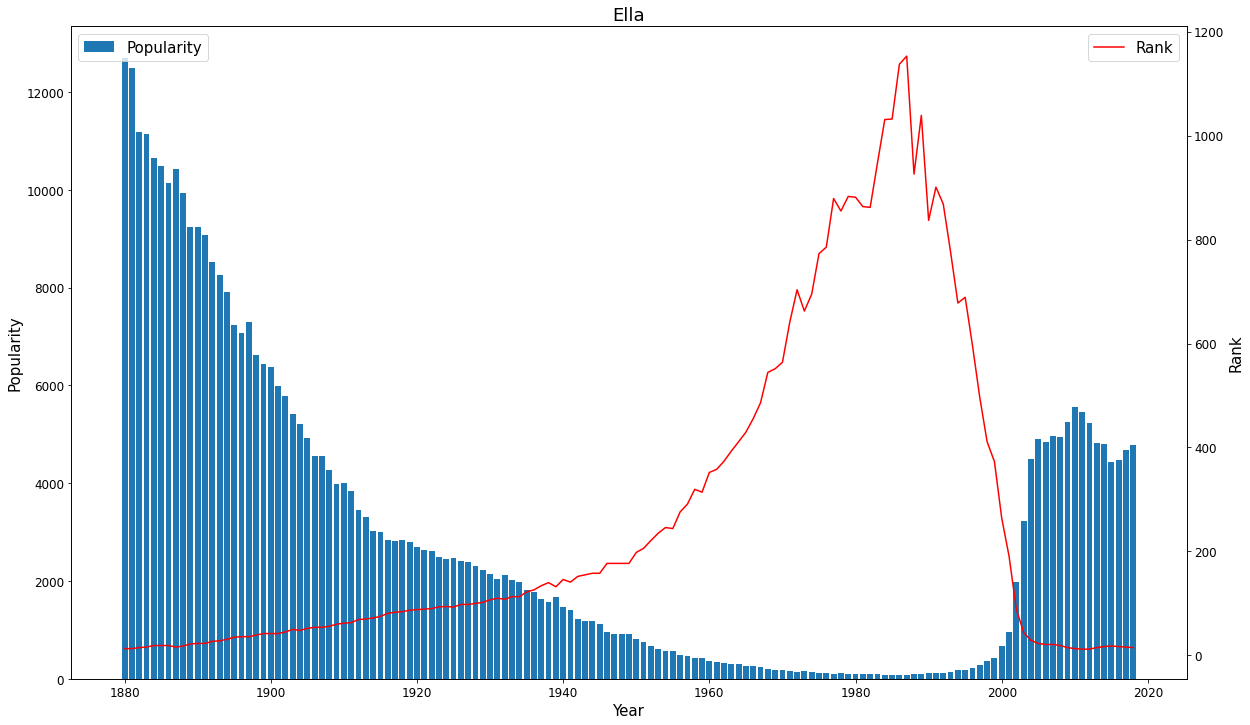

In [66]:
for name in f_evergreen.Name:
    plot_name(name, "F", crit = "Popularity")

## Why does a Name´s Popularity suddenly change? (Part 1)

In [67]:
df

,Year,Name,Gender,Count,Popularity,Rank
0,1880,Mary,F,7065,77642,1
1,1880,Anna,F,2604,28617,2
2,1880,Emma,F,2003,22012,3
3,1880,Elizabeth,F,1939,21309,4
4,1880,Minnie,F,1746,19188,5
...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,3,13042
1957042,2018,Zyran,M,5,3,13042
1957043,2018,Zyrie,M,5,3,13042
1957044,2018,Zyron,M,5,3,13042


In [68]:
df.loc[(df.Name == "Mary") & (df.Gender == "F"), "Popularity"].shift()

0           nan
2000      77642
3935      75245
6062      75551
8146      71333
           ... 
1793168    1514
1826414    1477
1859539    1478
1892548    1420
1925138    1397
Name: Popularity, Length: 139, dtype: float64

In [69]:
df["Pop_lag1"] = df.groupby(["Name", "Gender"]).Popularity.shift()

In [70]:
df

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1
0,1880,Mary,F,7065,77642,1,nan
1,1880,Anna,F,2604,28617,2,nan
2,1880,Emma,F,2003,22012,3,nan
3,1880,Elizabeth,F,1939,21309,4,nan
4,1880,Minnie,F,1746,19188,5,nan
...,...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,3,13042,4
1957042,2018,Zyran,M,5,3,13042,3
1957043,2018,Zyrie,M,5,3,13042,3
1957044,2018,Zyron,M,5,3,13042,8


In [71]:
df[df.Name == "Ashanti"]

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1
700697,1970,Ashanti,F,14,8,4142,nan
708512,1970,Ashanti,M,14,8,2565,nan
714597,1971,Ashanti,F,21,13,3216,8
724746,1971,Ashanti,M,8,5,3809,8
729787,1972,Ashanti,F,21,14,3117,13
...,...,...,...,...,...,...,...
1827752,2015,Ashanti,F,157,88,1464,103
1857597,2015,Ashanti,M,5,3,13046,3
1860841,2016,Ashanti,F,161,91,1432,88
1893982,2017,Ashanti,F,140,81,1562,91


In [72]:
df.loc[(df.Year > 1880) & (df.Pop_lag1.isna()), "Pop_lag1"] = 0

In [73]:
df[df.Name == "Ashanti"]

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1
700697,1970,Ashanti,F,14,8,4142,0
708512,1970,Ashanti,M,14,8,2565,0
714597,1971,Ashanti,F,21,13,3216,8
724746,1971,Ashanti,M,8,5,3809,8
729787,1972,Ashanti,F,21,14,3117,13
...,...,...,...,...,...,...,...
1827752,2015,Ashanti,F,157,88,1464,103
1857597,2015,Ashanti,M,5,3,13046,3
1860841,2016,Ashanti,F,161,91,1432,88
1893982,2017,Ashanti,F,140,81,1562,91


In [74]:
df["Pop_diff"] = df.Popularity - df.Pop_lag1

In [75]:
df[(df.Name == "Mary") & (df.Gender == "F")]

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1,Pop_diff
0,1880,Mary,F,7065,77642,1,nan,nan
2000,1881,Mary,F,6919,75245,1,77642,-2398
3935,1882,Mary,F,8148,75551,1,75245,307
6062,1883,Mary,F,8012,71333,1,75551,-4219
8146,1884,Mary,F,9217,71439,1,71333,107
...,...,...,...,...,...,...,...,...
1793168,2014,Mary,F,2632,1477,120,1514,-37
1826414,2015,Mary,F,2631,1478,123,1477,1
1859539,2016,Mary,F,2508,1420,127,1478,-58
1892548,2017,Mary,F,2402,1397,126,1420,-23


In [76]:
df[df.Name == "Ashanti"]

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1,Pop_diff
700697,1970,Ashanti,F,14,8,4142,0,8
708512,1970,Ashanti,M,14,8,2565,0,8
714597,1971,Ashanti,F,21,13,3216,8,5
724746,1971,Ashanti,M,8,5,3809,8,-3
729787,1972,Ashanti,F,21,14,3117,13,1
...,...,...,...,...,...,...,...,...
1827752,2015,Ashanti,F,157,88,1464,103,-15
1857597,2015,Ashanti,M,5,3,13046,3,-0
1860841,2016,Ashanti,F,161,91,1432,88,3
1893982,2017,Ashanti,F,140,81,1562,91,-10


In [77]:
df2 = df[df.Year >= 1900].copy()

In [78]:
df2

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1,Pop_diff
52265,1900,Mary,F,16706,55724,1,56527,-802
52266,1900,Helen,F,6343,21158,2,21663,-506
52267,1900,Anna,F,6114,20394,3,21951,-1557
52268,1900,Margaret,F,5304,17692,4,18234,-542
52269,1900,Ruth,F,4765,15894,5,16788,-894
...,...,...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,3,13042,4,-1
1957042,2018,Zyran,M,5,3,13042,3,-0
1957043,2018,Zyrie,M,5,3,13042,3,0
1957044,2018,Zyron,M,5,3,13042,8,-5


In [79]:
df2.nlargest(20, "Pop_diff")

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1,Pop_diff
431066,1947,Linda,F,99689,56236,1,33547,22689
321479,1935,Shirley,F,42358,40398,2,21874,18524
922468,1983,Ashley,F,33293,19930,4,8775,11156
711426,1971,Jennifer,F,56783,34134,1,26403,7730
726721,1972,Jennifer,F,63603,41813,1,34134,7680
312301,1934,Shirley,F,22840,21874,4,14203,7671
645417,1966,Michelle,F,27151,16047,4,9186,6861
751941,1973,Jason,M,46683,29940,3,23081,6859
844807,1979,Amanda,F,31928,19890,3,13394,6496
696647,1970,Jennifer,F,46157,26403,1,19978,6425


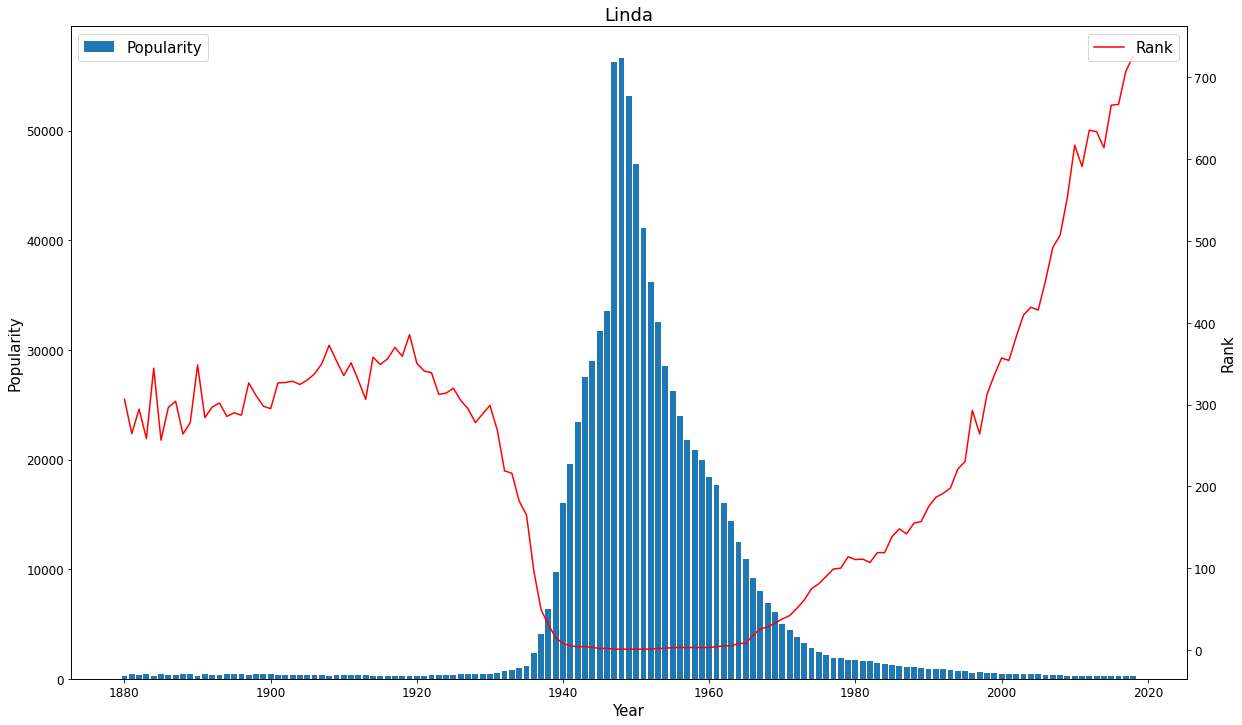

In [80]:
plot_name("Linda", "F")

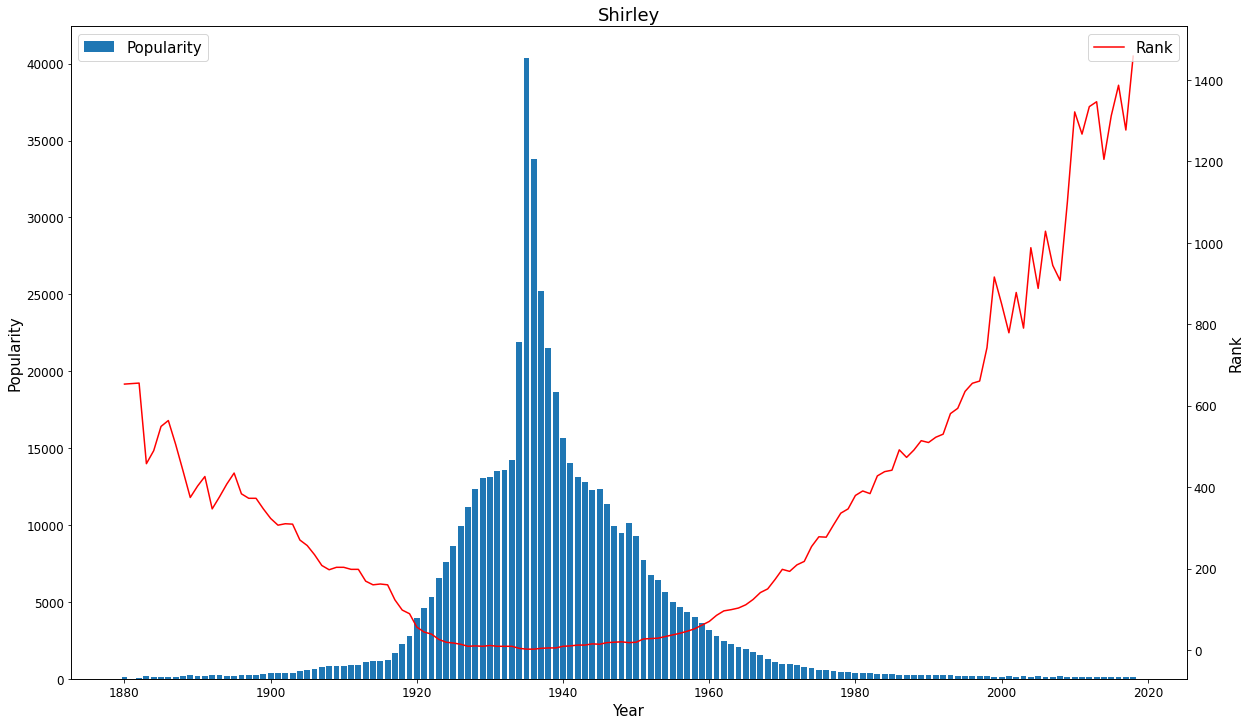

In [81]:
plot_name("Shirley", "F")

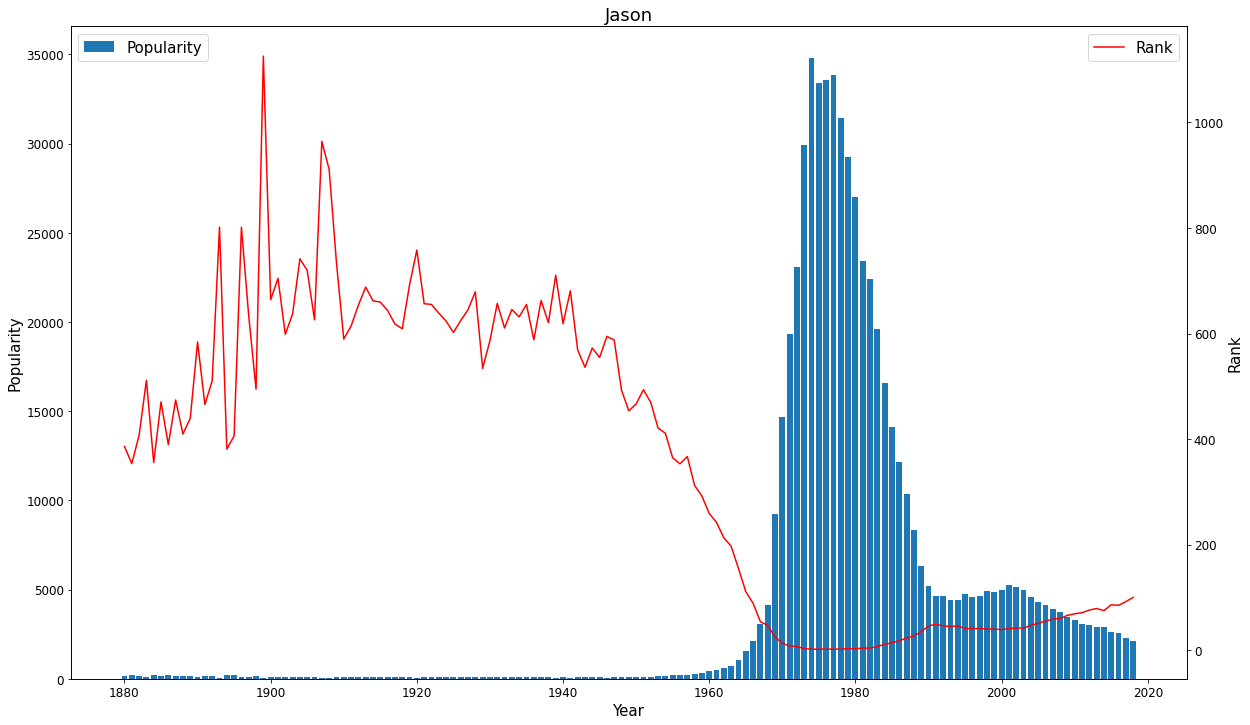

In [82]:
plot_name("Jason", "M")

In [83]:
df2.nsmallest(20, "Pop_diff")

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1,Pop_diff
339412,1937,Shirley,F,26816,25204,4,33798,-8593
330516,1936,Shirley,F,35161,33798,2,40398,-6601
461947,1950,Linda,F,80431,46952,1,53199,-6248
472250,1951,Linda,F,73978,41079,1,46952,-5872
961380,1985,Jennifer,F,42651,24789,3,30032,-5243
482712,1952,Linda,F,67082,36174,1,41079,-4905
696648,1970,Lisa,F,38963,22288,2,26692,-4404
437173,1947,Richard,M,58521,31990,5,36252,-4263
537623,1957,Deborah,F,40071,19601,6,23827,-4226
504196,1954,Linda,F,55381,28520,2,32572,-4052


## Why does a Name´s Popularity suddenly change? (Part 2)

__'From 0 to 100' Names__

In [84]:
df2[(df2.Pop_lag1 < 5)].nlargest(20, "Pop_diff")

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1,Pop_diff
758040,1974,Nakia,F,1134,773,226,5,768
808621,1977,Kizzy,F,1116,728,223,0,728
1060680,1989,Christop,M,1082,541,242,0,541
768358,1974,Nakia,M,612,389,302,0,389
820064,1977,Levar,M,523,318,342,0,318
645832,1966,Tabatha,F,500,296,419,3,293
1553888,2007,Jaslene,F,501,261,600,3,258
1223510,1996,Moesha,F,426,243,548,0,243
1070200,1990,Isamar,F,446,235,534,0,235
961890,1985,Sade,F,393,228,512,0,228


In [85]:
df2[df2.Name == "Nakia"]

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1,Pop_diff
749309,1973,Nakia,F,7,5,7049,0,5
758040,1974,Nakia,F,1134,773,226,5,768
768358,1974,Nakia,M,612,389,302,0,389
774314,1975,Nakia,F,972,667,251,773,-106
785009,1975,Nakia,M,514,329,338,389,-60
...,...,...,...,...,...,...,...,...
1834158,2015,Nakia,F,15,8,7792,11,-2
1854673,2015,Nakia,M,8,4,9138,5,-1
1865530,2016,Nakia,F,21,12,6072,8,3
1906059,2017,Nakia,F,7,4,13370,12,-8


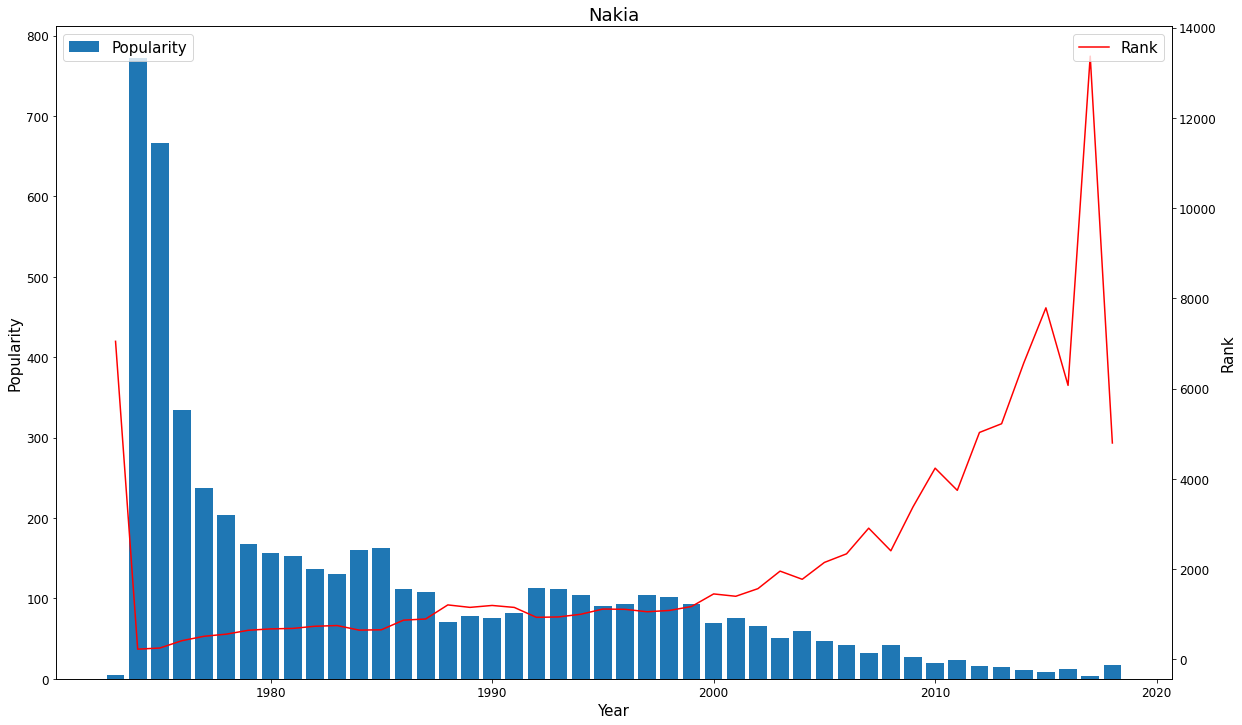

In [86]:
plot_name("Nakia", "F")

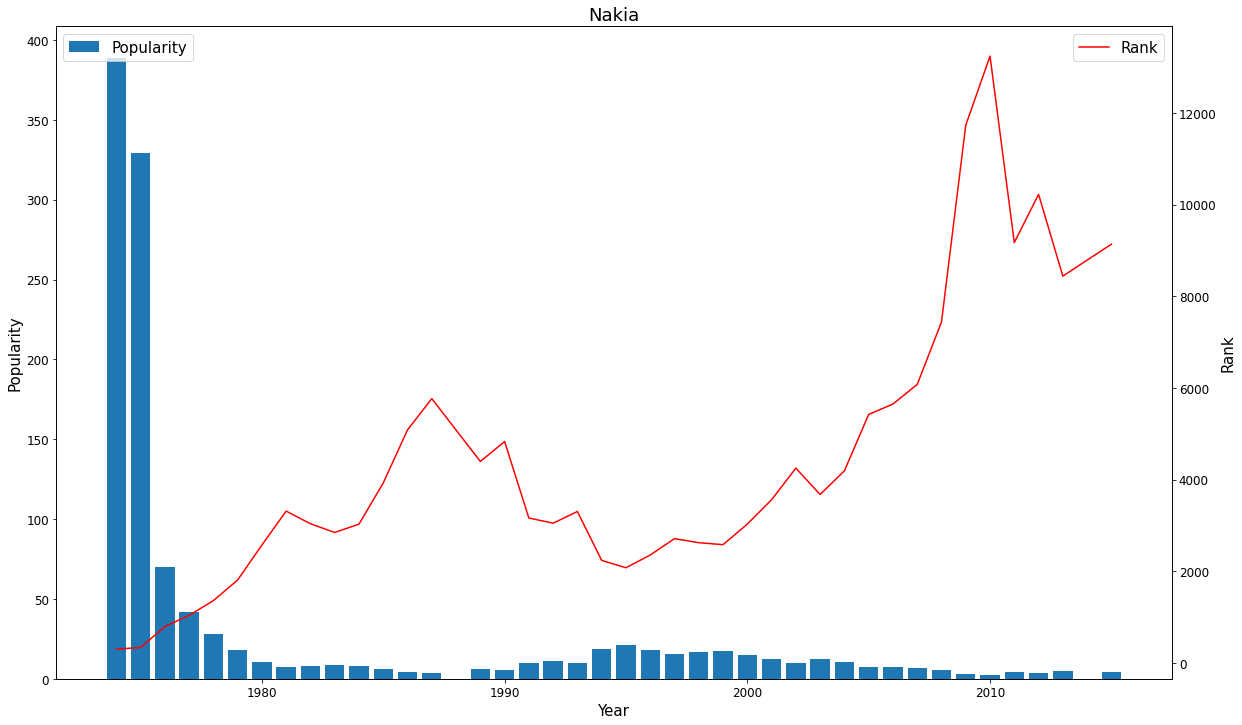

In [87]:
plot_name("Nakia", "M")

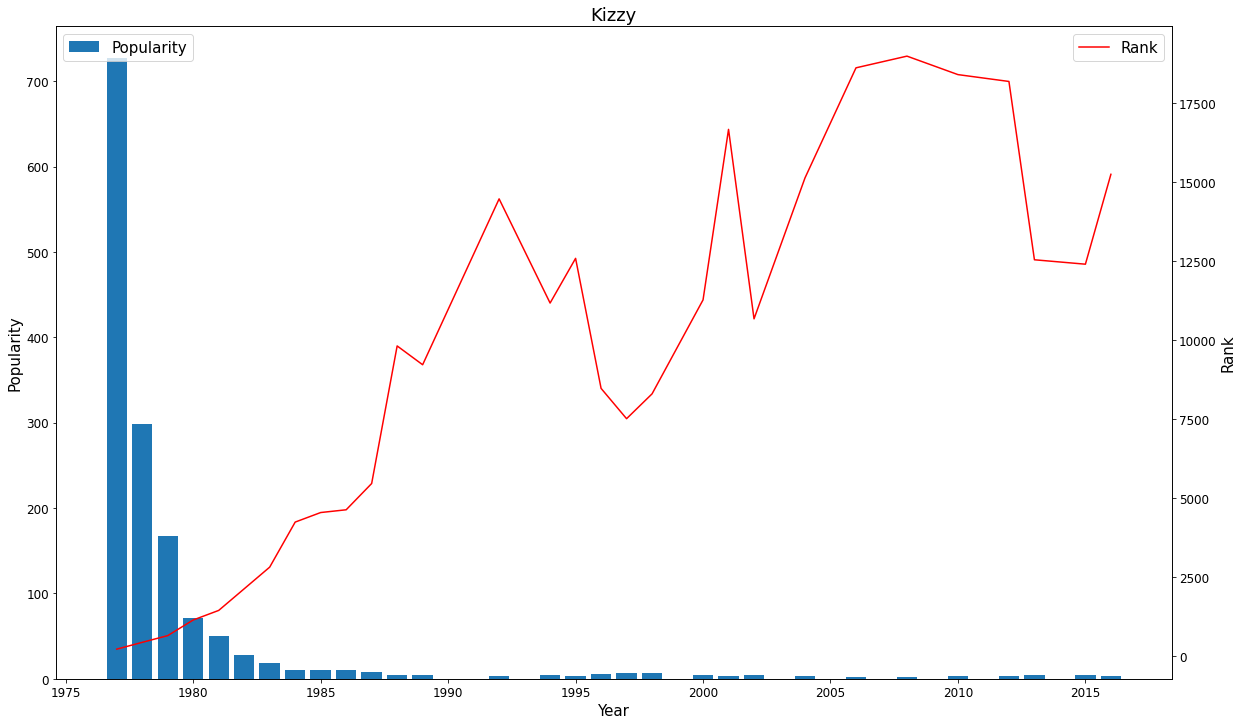

In [88]:
plot_name("Kizzy", "F")

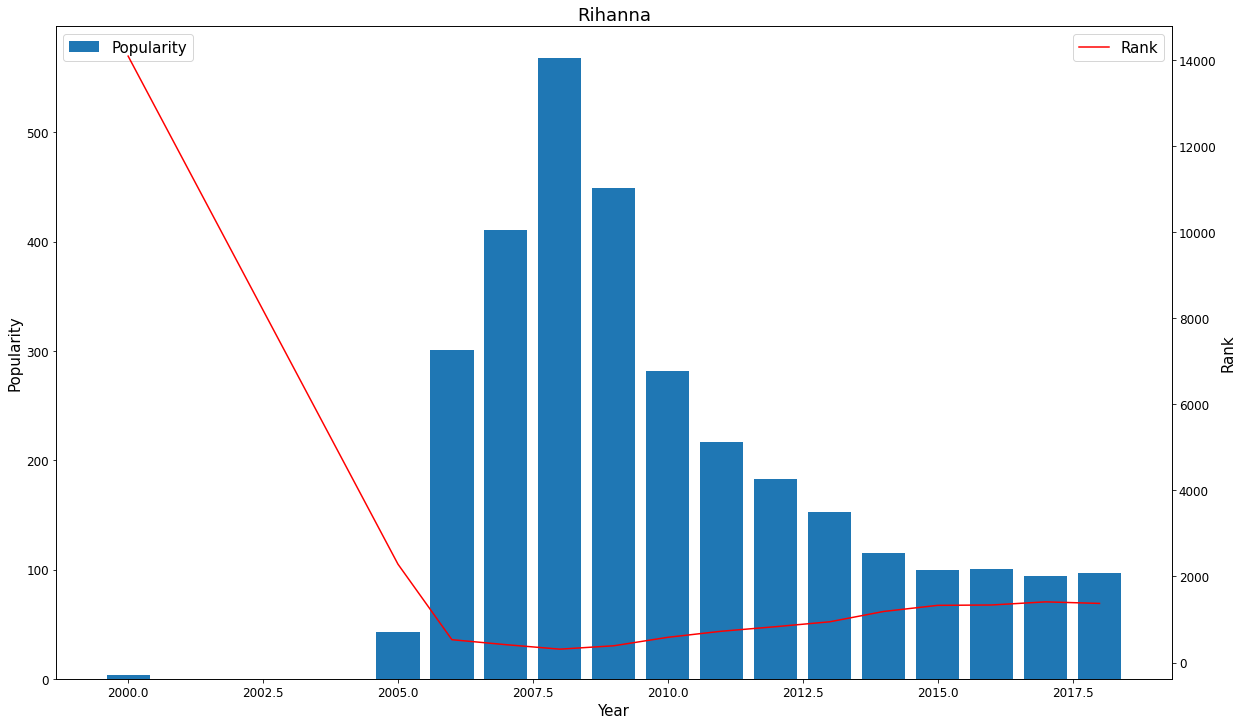

In [89]:
plot_name("Rihanna", "F")

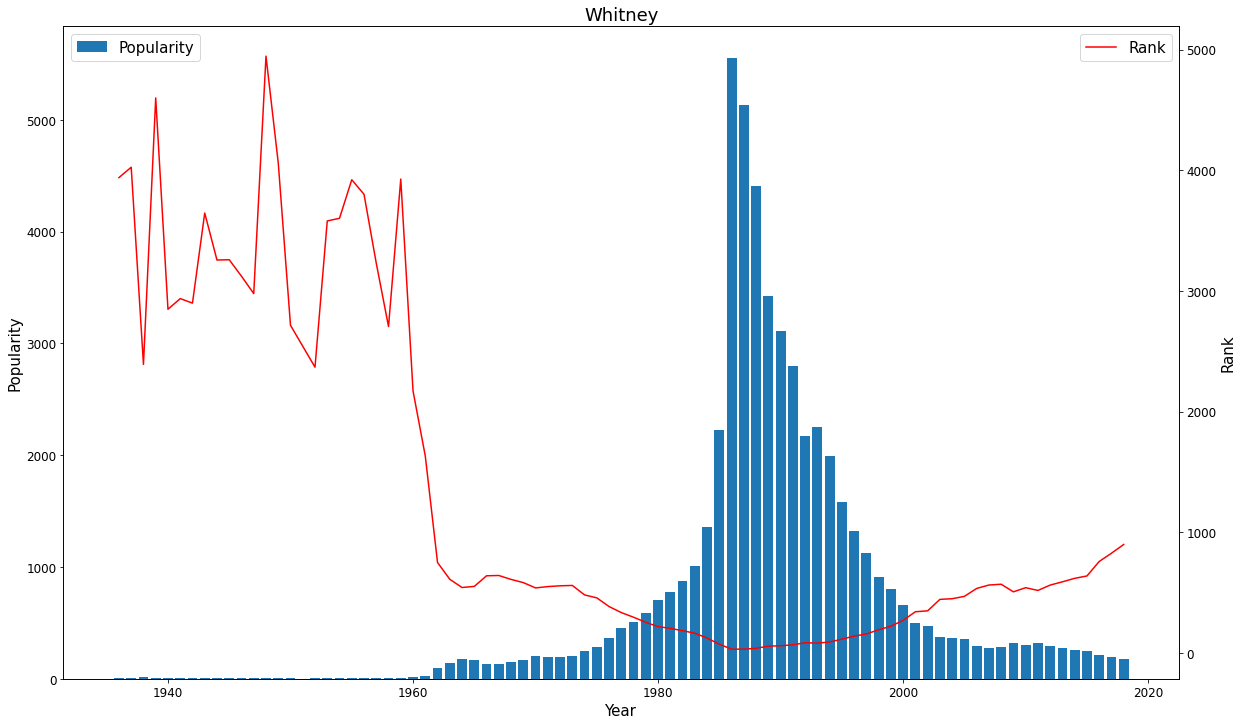

In [90]:
plot_name("Whitney", "F")

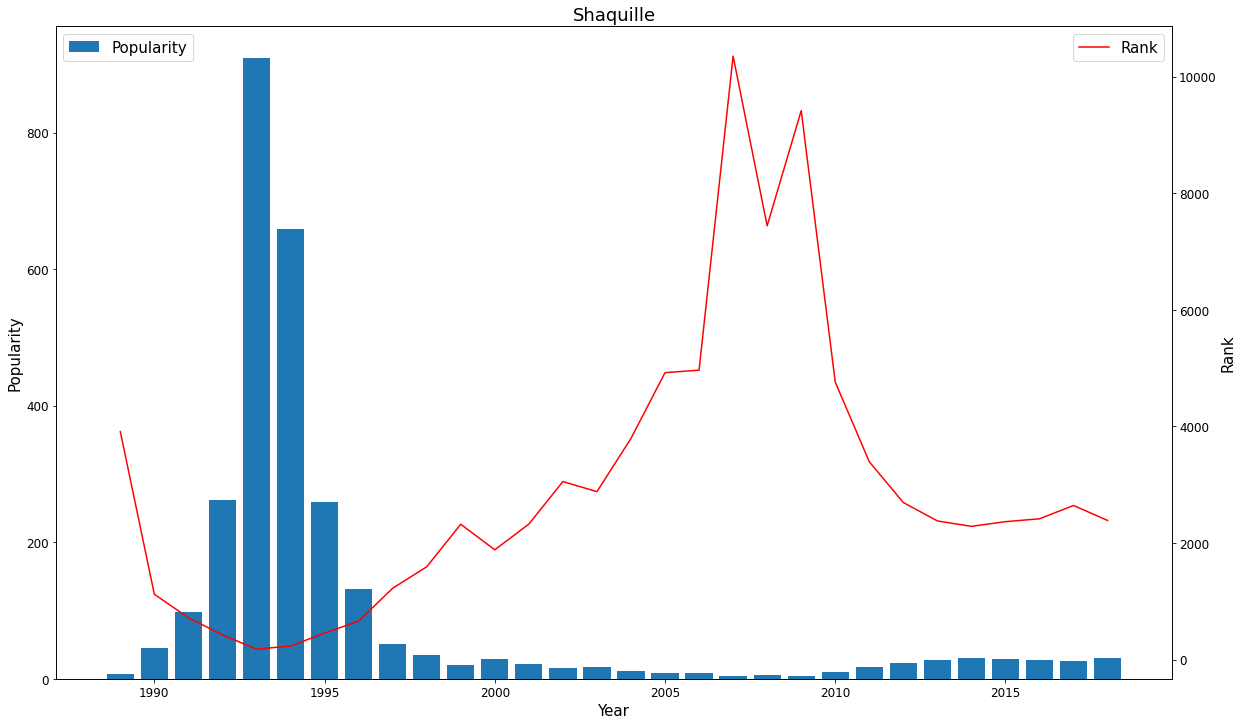

In [91]:
plot_name("Shaquille", "M")

__Highest percentage decrease among popular names__

In [92]:
df2

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1,Pop_diff
52265,1900,Mary,F,16706,55724,1,56527,-802
52266,1900,Helen,F,6343,21158,2,21663,-506
52267,1900,Anna,F,6114,20394,3,21951,-1557
52268,1900,Margaret,F,5304,17692,4,18234,-542
52269,1900,Ruth,F,4765,15894,5,16788,-894
...,...,...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,3,13042,4,-1
1957042,2018,Zyran,M,5,3,13042,3,-0
1957043,2018,Zyrie,M,5,3,13042,3,0
1957044,2018,Zyron,M,5,3,13042,8,-5


In [93]:
df2["%change"] = df2.Popularity.div(df2.Pop_lag1).sub(1).mul(100)

In [94]:
df2

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1,Pop_diff,%change
52265,1900,Mary,F,16706,55724,1,56527,-802,-1
52266,1900,Helen,F,6343,21158,2,21663,-506,-2
52267,1900,Anna,F,6114,20394,3,21951,-1557,-7
52268,1900,Margaret,F,5304,17692,4,18234,-542,-3
52269,1900,Ruth,F,4765,15894,5,16788,-894,-5
...,...,...,...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,3,13042,4,-1,-27
1957042,2018,Zyran,M,5,3,13042,3,-0,-12
1957043,2018,Zyrie,M,5,3,13042,3,0,2
1957044,2018,Zyron,M,5,3,13042,8,-5,-66


In [95]:
df2[df2.Pop_lag1 > 1000].nsmallest(20, "%change")

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1,Pop_diff,%change
758121,1974,Katina,F,765,521,307,1697,-1175,-69
1119924,1992,Iesha,F,581,315,432,1011,-696,-69
1423744,2003,Ashanti,F,962,527,325,1640,-1113,-68
515370,1955,Marian,F,1499,767,208,2067,-1300,-63
175401,1920,Woodrow,M,774,727,182,1845,-1117,-61
1145180,1993,Hillary,F,1064,588,261,1367,-779,-57
1249716,1997,Shania,F,861,495,330,1047,-552,-53
54563,1900,Dewey,M,345,2293,75,4698,-2406,-51
275072,1930,Jeannine,F,593,527,258,1060,-533,-50
981635,1986,Sheena,F,1573,917,173,1780,-863,-48


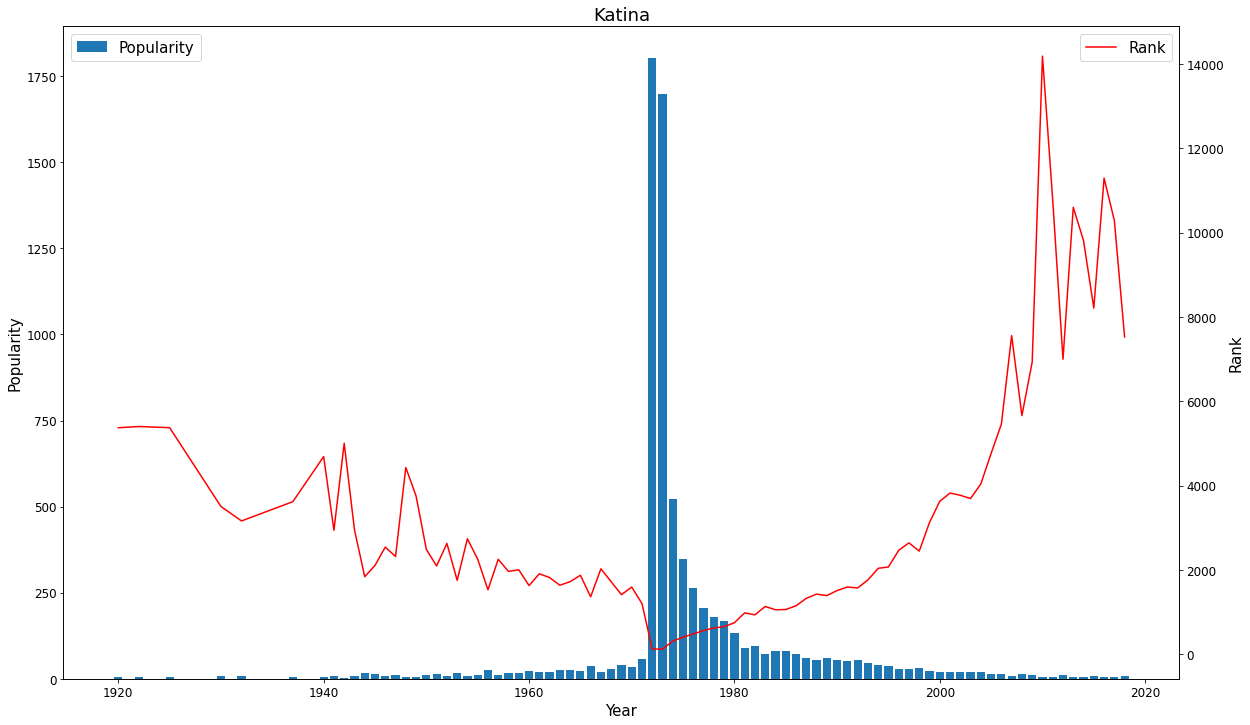

In [96]:
plot_name("Katina", "F")

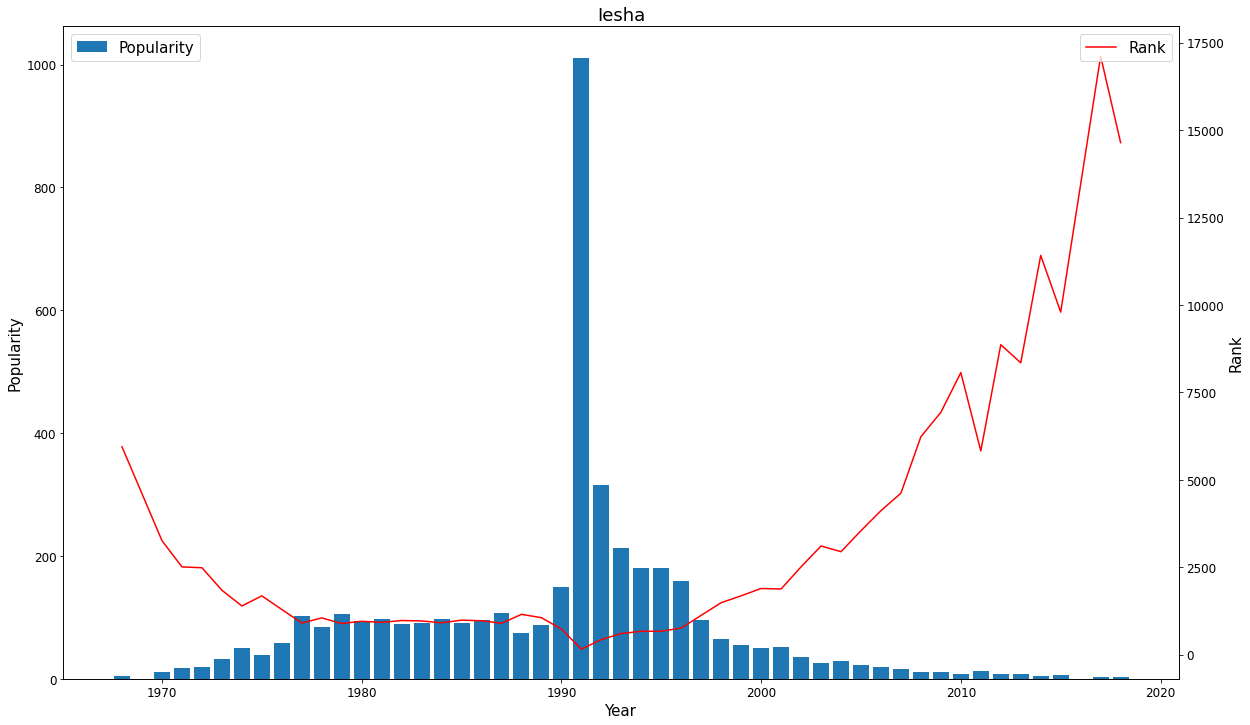

In [97]:
plot_name("Iesha", "F")

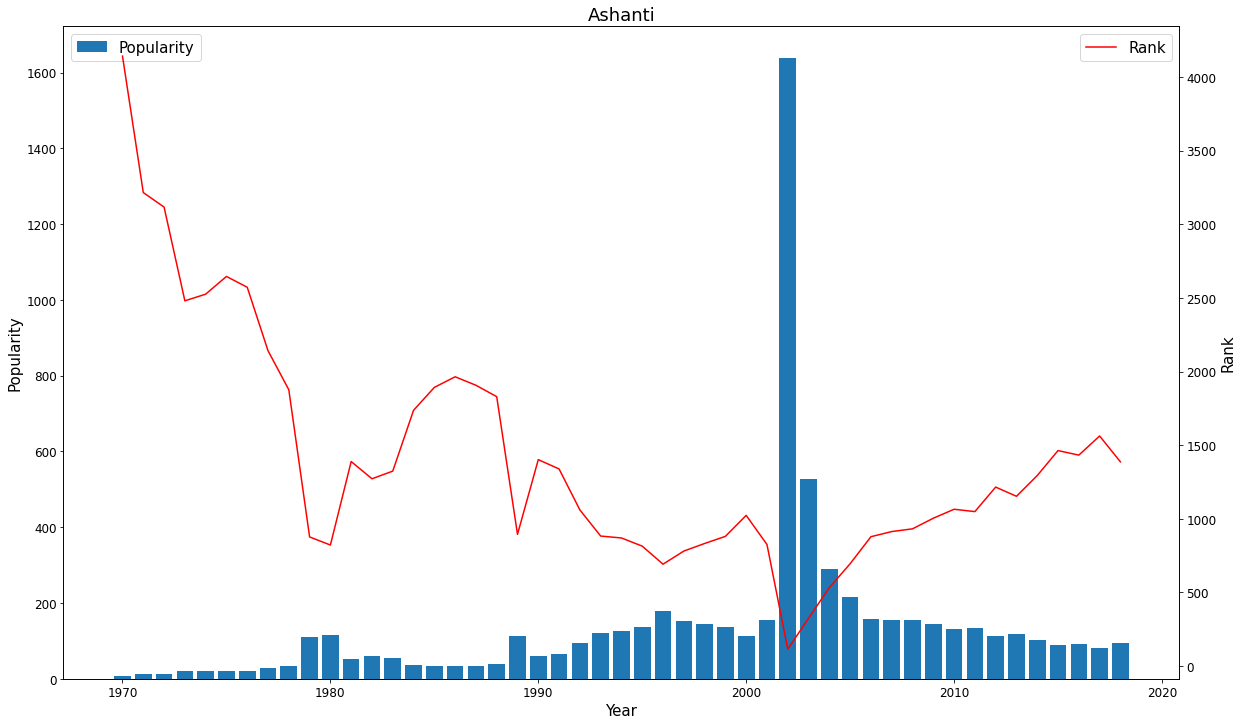

In [98]:
plot_name("Ashanti", "F")

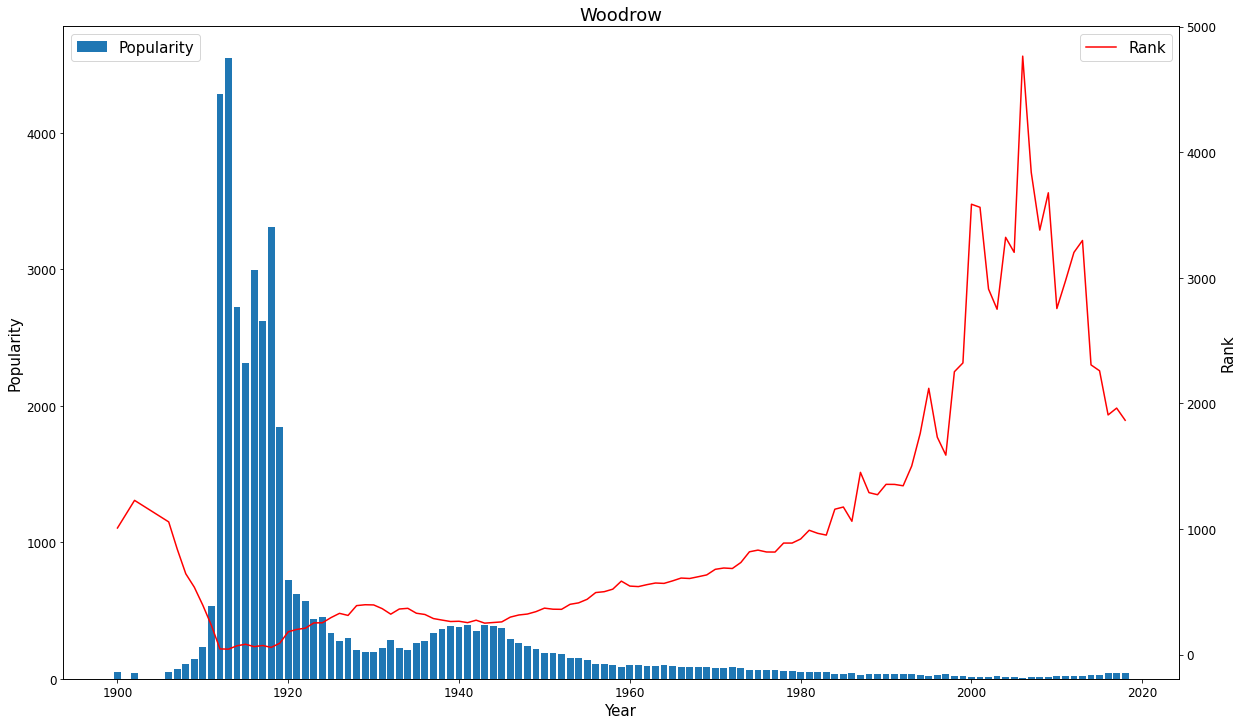

In [99]:
plot_name("Woodrow", "M")

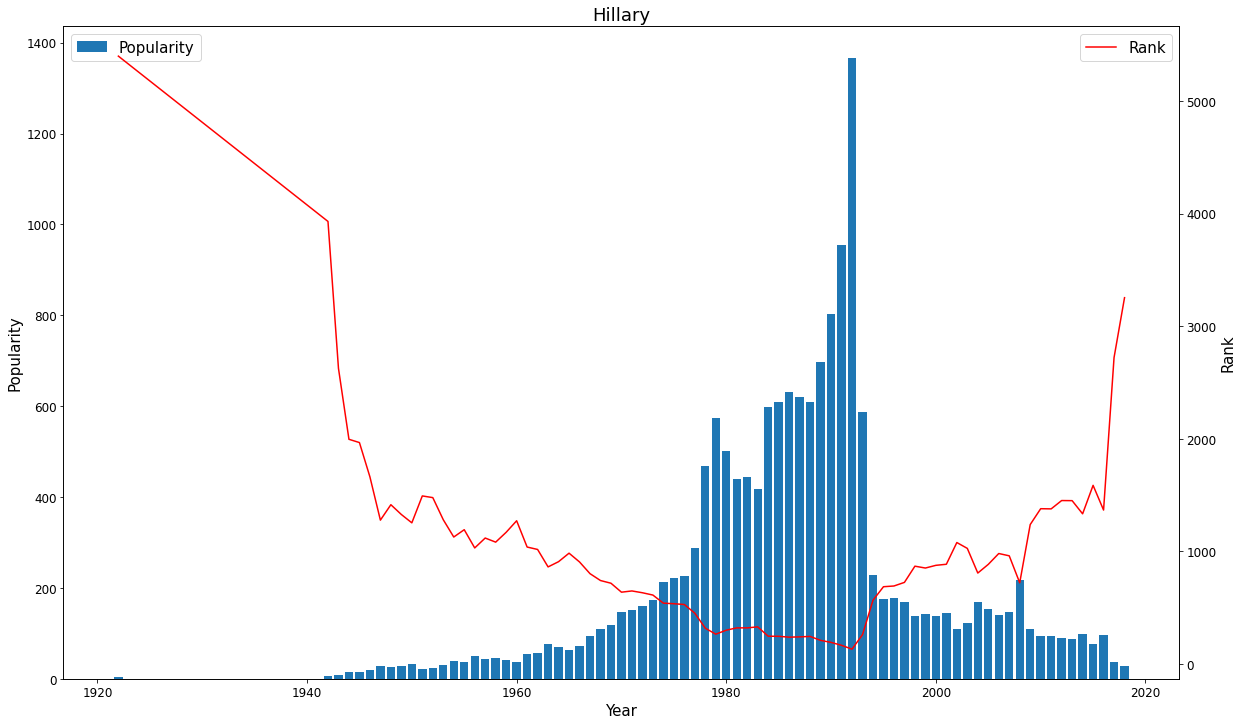

In [100]:
plot_name("Hillary", "F")

## Persistant vs. Spike-Fade Names

In [101]:
agg

,,Total,No_Year,First_Year,Last_Year,Max_Count
Name,Gender,,,,,
Aaban,M,114,11,2007,2018,16
Aabha,F,35,5,2011,2016,9
Aabid,M,16,3,2003,2018,6
Aabidah,F,5,1,2018,2018,5
Aabir,M,10,2,2016,2018,5
...,...,...,...,...,...,...
Zyvion,M,5,1,2009,2009,5
Zyvon,M,7,1,2015,2015,7
Zyyanna,F,6,1,2010,2010,6


In [102]:
agg["Spike_Score"] = agg.Max_Count.div(agg.Total).mul(100)

In [ ]:
agg

In [103]:
agg.sort_values(by = "Spike_Score", ascending = True).head(20)

,,Total,No_Year,First_Year,Last_Year,Max_Count,Spike_Score
Name,Gender,,,,,,
Joseph,M,2613304,139,1880,2018,32732,1
Elizabeth,F,1638349,139,1880,2018,20744,1
Rosa,F,174125,139,1880,2018,2230,1
Maurice,M,134504,139,1880,2018,1743,1
Delia,F,36276,139,1880,2018,491,1
Cornelius,M,35764,139,1880,2018,485,1
Domingo,M,13797,121,1882,2018,190,1
Marshall,M,91352,139,1880,2018,1270,1
Teodoro,M,3079,111,1884,2018,43,1


In [104]:
pers = agg.sort_values(by = "Spike_Score", ascending = True).head(20)

In [105]:
pers

,,Total,No_Year,First_Year,Last_Year,Max_Count,Spike_Score
Name,Gender,,,,,,
Joseph,M,2613304,139,1880,2018,32732,1
Elizabeth,F,1638349,139,1880,2018,20744,1
Rosa,F,174125,139,1880,2018,2230,1
Maurice,M,134504,139,1880,2018,1743,1
Delia,F,36276,139,1880,2018,491,1
Cornelius,M,35764,139,1880,2018,485,1
Domingo,M,13797,121,1882,2018,190,1
Marshall,M,91352,139,1880,2018,1270,1
Teodoro,M,3079,111,1884,2018,43,1


In [106]:
l = list(zip(pers.Name, pers.Gender))
l

AttributeError: ignored

In [107]:
for name in l:
    plot_name(name = name[0], gender = name[1], crit = "Count")

NameError: ignored

In [108]:
spike = agg[(agg.Total > 1000) & (agg.No_Year > 10)].sort_values(by = "Spike_Score",
                                                                 ascending = False).head(20)
spike

,,Total,No_Year,First_Year,Last_Year,Max_Count,Spike_Score
Name,Gender,,,,,,
Kizzy,F,2325,30,1977,2016,1116,48
Oaklyn,F,1381,11,2006,2018,627,45
Deneen,F,3603,52,1947,2007,1604,45
Moesha,F,1067,14,1996,2014,426,40
Mareli,F,1038,22,1995,2018,411,40
Marely,F,2606,29,1989,2018,1004,39
Kanye,M,1334,17,2002,2018,509,38
Kairo,M,1632,24,1995,2018,605,37
Tennille,F,2172,32,1975,2012,769,35


In [109]:
l2 = list(zip(spike.Name, spike.Gender))
l2

AttributeError: ignored

In [110]:
for name in l2:
    plot_name(name = name[0], gender = name[1], crit = "Count")

NameError: ignored

## Most Popular Unisex Names

In [111]:
df

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1,Pop_diff
0,1880,Mary,F,7065,77642,1,nan,nan
1,1880,Anna,F,2604,28617,2,nan,nan
2,1880,Emma,F,2003,22012,3,nan,nan
3,1880,Elizabeth,F,1939,21309,4,nan,nan
4,1880,Minnie,F,1746,19188,5,nan,nan
...,...,...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,3,13042,4,-1
1957042,2018,Zyran,M,5,3,13042,3,-0
1957043,2018,Zyrie,M,5,3,13042,3,0
1957044,2018,Zyron,M,5,3,13042,8,-5


In [112]:
df[df.Name == "Mary"].groupby(["Name", "Gender"]).Count.sum()

Name  Gender
Mary  F         4125675
      M           15165
Name: Count, dtype: int64

In [113]:
df.groupby(["Name", "Gender"]).Count.sum().unstack()

Gender,F,M
Name,,
Aaban,nan,114
Aabha,35,nan
Aabid,nan,16
Aabidah,5,nan
Aabir,nan,10
...,...,...
Zyvion,nan,5
Zyvon,nan,7
Zyyanna,6,nan


In [114]:
unisex = df.groupby(["Name", "Gender"]).Count.sum().unstack()
unisex

Gender,F,M
Name,,
Aaban,nan,114
Aabha,35,nan
Aabid,nan,16
Aabidah,5,nan
Aabir,nan,10
...,...,...
Zyvion,nan,5
Zyvon,nan,7
Zyyanna,6,nan


In [115]:
unisex.dropna(inplace = True)

In [116]:
unisex

Gender,F,M
Name,,
Aaden,5,4828
Aadi,16,851
Aadyn,16,516
Aalijah,149,212
Aaliyah,87442,96
...,...,...
Zyion,168,918
Zyon,620,2638
Zyonn,5,40


In [117]:
unisex.min(axis = 1).sort_values(ascending = False)

Name
Willie     146156
Jordan     131004
Leslie     112726
Taylor     110390
Jessie     110212
            ...  
Chrisley        5
Mclane          5
Mckinly         5
Mckenly         5
Aaden           5
Length: 10773, dtype: float64

In [118]:
unisex_names = unisex.min(axis = 1).sort_values(ascending = False).index
unisex_names

Index(['Willie', 'Jordan', 'Leslie', 'Taylor', 'Jessie', 'Terry', 'Angel',
       'Riley', 'Jamie', 'Kelly',
       ...
       'Meher', 'Mehan', 'Medley', 'Chrishaun', 'Mcrae', 'Chrisley', 'Mclane',
       'Mckinly', 'Mckenly', 'Aaden'],
      dtype='object', name='Name', length=10773)

In [119]:
unisex.loc[unisex_names].head(20)

Gender,F,M
Name,,
Willie,146156,448946
Jordan,131004,374513
Leslie,267081,112726
Taylor,320446,110390
Jessie,167462,110212
Terry,96895,422916
Angel,95710,231800
Riley,106901,94278
Jamie,268102,85631


In [120]:
unisex = unisex[unisex.min(axis = 1) > 10000]
unisex

Gender,F,M
Name,,
Addison,121435,12895
Adrian,15258,237044
Alexis,338333,63604
Amari,14415,17932
Angel,95710,231800
...,...,...
Tommie,17415,34210
Tracy,250853,61223
Tyler,16585,587571


In [121]:
abs(unisex.F.div(unisex.M).sub(1)).sort_values()

Name
Elisha       0
Quinn        0
Kerry        0
Blair        0
Kris         0
            ..
Stacey      10
Courtney    10
Jean        18
Ashley      53
Mary       271
Length: 116, dtype: float64

In [122]:
unisex_names2 = abs(unisex.F.div(unisex.M).sub(1)).sort_values().index
unisex_names2

Index(['Elisha', 'Quinn', 'Kerry', 'Blair', 'Kris', 'Robbie', 'Justice',
       'Riley', 'Emerson', 'Jackie',
       ...
       'Sandy', 'Stacy', 'Carmen', 'Shelby', 'Addison', 'Stacey', 'Courtney',
       'Jean', 'Ashley', 'Mary'],
      dtype='object', name='Name', length=116)

In [123]:
unisex.loc[unisex_names2].head(20)

Gender,F,M
Name,,
Elisha,13762,13595
Quinn,31670,32071
Kerry,48549,49646
Blair,14922,14527
Kris,13504,14055
Robbie,22290,20926
Justice,16354,17580
Riley,106901,94278
Emerson,20904,24472
